# Problem statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [15]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

In [3]:
data_dir_train = pathlib.Path("C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy")
data_dir_test = pathlib.Path("C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Test - Copy")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print('train dataset path: ', data_dir_train)
print('image_count_train: ', image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print('test dataset path: ', data_dir_test)
print('image_count_test: ', image_count_test)

train dataset path:  C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy
image_count_train:  2239
test dataset path:  C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Test - Copy
image_count_test:  118


In [5]:
list(data_dir_test.glob('*/*.jpg'))[0:10]

[WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma Detection/Data/Test - Copy/actinic keratosis/ISIC_0010512.jpg'),
 WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma Detection/Data/Test - Copy/actinic keratosis/ISIC_0010889.jpg'),
 WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma Detection/Data/Test - Copy/actinic keratosis/ISIC_0024468.jpg'),
 WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma Detection/Data/Test - Copy/actinic keratosis/ISIC_0024470.jpg'),
 WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma Detection/Data/Test - Copy/actinic keratosis/ISIC_0024511.jpg'),
 WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma Detection/Data/Test - Copy/actinic keratosis/ISIC_0024646.jpg'),
 WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma Detection/Data/Test - Copy/actinic keratosis/ISIC_0024654.jpg'),
 WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma D

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print('image_count_train: ', image_count_train)

image_count_train:  2239


In [22]:
#clases folders count
len(list(data_dir_train.glob('*')))

9

In [23]:
class_names = []
for i in data_dir_train.glob('*'):
    print('Folder: ', str(i).split('\\')[-1])
    class_names.append(str(i).split('\\')[-1])

Folder:  actinic keratosis
Folder:  basal cell carcinoma
Folder:  dermatofibroma
Folder:  melanoma
Folder:  nevus
Folder:  pigmented benign keratosis
Folder:  seborrheic keratosis
Folder:  squamous cell carcinoma
Folder:  vascular lesion


In [24]:
## list of the class names taken from train dataset
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [25]:
# Getting the test images count.
test_image_count=[]
for i in class_names:
    test_image_count.append(len(list(data_dir_test.glob(i + '/*.jpg'))))

In [26]:
print('Test Classes and their image counts: ')
for i in range(len(class_names)):
    print('Class', i+1, class_names[i], '-', test_image_count[i])

Test Classes and their image counts: 
Class 1 actinic keratosis - 16
Class 2 basal cell carcinoma - 16
Class 3 dermatofibroma - 16
Class 4 melanoma - 16
Class 5 nevus - 16
Class 6 pigmented benign keratosis - 16
Class 7 seborrheic keratosis - 3
Class 8 squamous cell carcinoma - 16
Class 9 vascular lesion - 3


In [27]:
train_image_count=[]
for i in class_names:
    train_image_count.append(len(list(data_dir_train.glob(i + '/*.jpg'))))

In [28]:
print('Train Classes and their image counts: ')
for i in range(len(class_names)):
    print('Class', i+1, class_names[i], '-', train_image_count[i])

Train Classes and their image counts: 
Class 1 actinic keratosis - 114
Class 2 basal cell carcinoma - 376
Class 3 dermatofibroma - 95
Class 4 melanoma - 438
Class 5 nevus - 357
Class 6 pigmented benign keratosis - 462
Class 7 seborrheic keratosis - 77
Class 8 squamous cell carcinoma - 181
Class 9 vascular lesion - 139


In [29]:
dict_images_count = {'class_names':class_names, 
                     'train_image_count': train_image_count, 
                     'test_image_count': test_image_count}
df_images_count = pd.DataFrame(dict_images_count)
df_images_count

,class_names,train_image_count,test_image_count
0,actinic keratosis,114,16
1,basal cell carcinoma,376,16
2,dermatofibroma,95,16
3,melanoma,438,16
4,nevus,357,16
5,pigmented benign keratosis,462,16
6,seborrheic keratosis,77,3
7,squamous cell carcinoma,181,16
8,vascular lesion,139,3


In [30]:
print('image_count_train: ', image_count_train, 'df_images_count: ', df_images_count['train_image_count'].sum())
print('image_count_test: ', image_count_test, 'df_images_count: ', df_images_count['test_image_count'].sum())

image_count_train:  2239 df_images_count:  2239
image_count_test:  118 df_images_count:  118


Count matched.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [16]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

Loading the images to using keras with following details.

    labels='inferred'=> so we can get labels are generated from the directory structure
    label_mode='int' => so that labels are encoded as integers (and we will use sparse_categorical_crossentropy loss).
    validation_split=0.2 => as per given value
    subset='both' to get the tuple of train and val dataset or give subset value as 'training' and 'validation' with same split and seed
    ```batch_size``` => Default value is 32

In [31]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                 labels='inferred', 
                                                 label_mode='int', 
                                                 batch_size=batch_size,
                                                 image_size=(img_height, img_width), 
                                                 seed=123, 
                                                 validation_split=0.2,
                                                 subset='training',
                                                 verbose=1)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [32]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                 labels='inferred', 
                                                 label_mode='int',
                                                 batch_size=32,
                                                 image_size=(img_height, img_width), 
                                                 seed=123, 
                                                 validation_split=0.2,
                                                 subset='validation',
                                                 verbose=1)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [34]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [35]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

Class names matched. 

In [36]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

shape as we see is 180x180 and has 3 channels

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

Showing 1 image from each class from train dataset


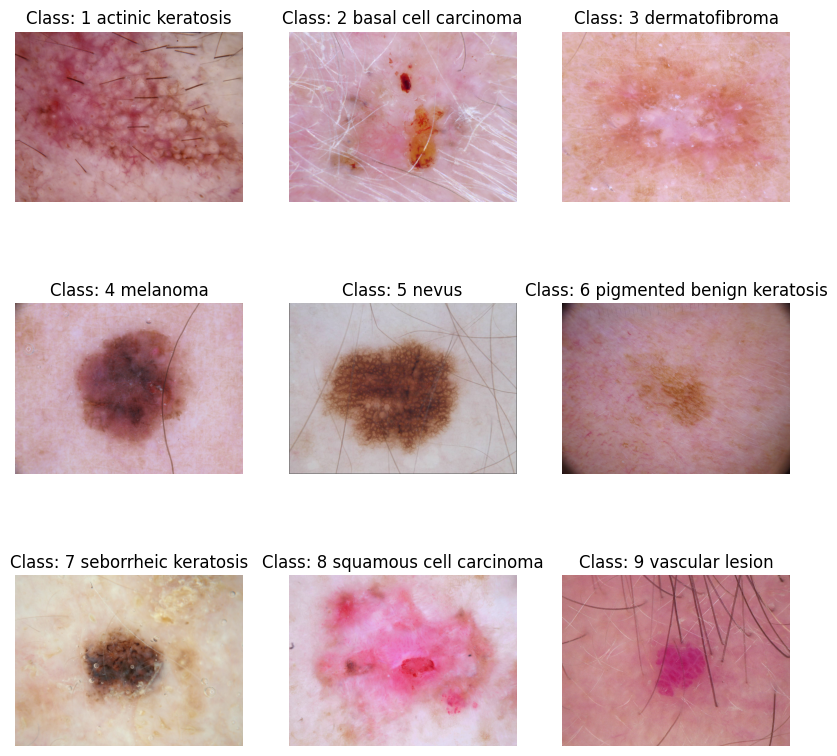

In [38]:
print('Showing 1 image from each class from train dataset')
plt.figure(figsize=(10, 10))
for i, class_name in enumerate(class_names):
    image_path = list(data_dir_train.glob(class_name + '/*.jpg'))[0]
    image = keras.utils.load_img(image_path,
                                color_mode="rgb",
                                target_size=None,
                                interpolation="nearest",
                                keep_aspect_ratio=False,)   
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Class: '+str(i+1)+' '  + class_name)
    plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

##### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. 

Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). 

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. 

Here, it is good to standardize values to be in the `[0, 1]`

#### Model 1

    Creating the Base
    for 10 epochs
    2 conv2d layers
    2 max pool layers

In [156]:
### Your code goes here
model1 = Sequential()
# rescaling the model to get values in 0-1 range
#model1.add(layers.Rescaling(scale=scale, offset=0.0))
# 1st Conv2D with 16
model1.add(layers.Conv2D(16, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3)
                        )
          )

model1.add(layers.MaxPooling2D(pool_size=(2, 2),
                            strides=None,
                            padding='same',)
          )
# 2nd Conv2D with 32
model1.add(layers.Conv2D(16, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3)
                        )
          )

model1.add(layers.MaxPooling2D(pool_size=(2, 2),
                            strides=None,
                            padding='same',)
          )

model1.add(layers.Flatten())

model1.add(layers.Dense(128, activation='relu'))

model1.add(layers.Dense(len(class_names), activation='softmax'))

model1.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 178, 178, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 89, 89, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 87, 87, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 44, 44, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,968,985 (15.14 MB)

 Trainable params: 3,968,985 (15.14 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
### Todo, choose an appropirate optimiser and loss function
model1.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [160]:
# View the summary of all layers
model1_history = model1.fit(train_ds, batch_size=32, epochs=10, validation_data=val_ds, verbose=1)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.1795 - loss: 67503690612736.0000 - val_accuracy: 0.1924 - val_loss: 2.1788
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.2012 - loss: 2.1737 - val_accuracy: 0.1924 - val_loss: 2.1593
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.1881 - loss: 2.1540 - val_accuracy: 0.2058 - val_loss: 2.1423
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.2216 - loss: 2.1337 - val_accuracy: 0.2058 - val_loss: 2.1275
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.2094 - loss: 2.1230 - val_accuracy: 0.2058 - val_loss: 2.1144
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.1966 - loss: 2.1053 - val_accuracy: 0.2058 - val_loss: 2.1030
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.2135 - loss: 2.0938 - val_accuracy: 0.2058 - val_loss: 2.0929
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.2102 - loss: 2.0815 - va

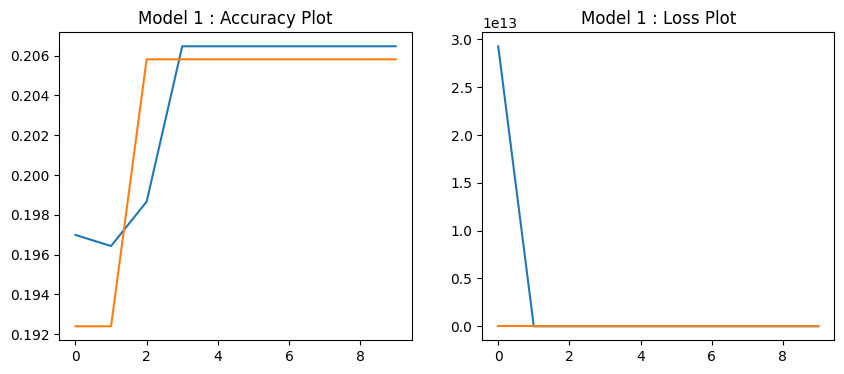

In [169]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('Model 1 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('Model 1 : Loss Plot')
plt.show()

##### Model 1 Observations

    1. Rescaling the model to get values in 0-1 range gave all the parameters as 0 so above model does not have any scaling
            #model2.add(layers.Rescaling(scale=scale, offset=0.0))
    2. Model has very few paramters (Conv2d 16)
    3. Shows no loss

#### Model 2 
    with increased neurons in layer 1 and 2
    optimizers = SGD
    loss='sparse_categorical_crossentropy',

In [170]:
### Your code goes here
model2 = Sequential()
# rescaling the model to get values in 0-1 range
#model2.add(layers.Rescaling(scale=scale, offset=0.0))
# 1st Conv2D with 32
model2.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3)
                        )
          )

model2.add(layers.MaxPooling2D(pool_size=(2, 2),
                            strides=None,
                            padding='same',)
          )
# 2nd Conv2D with 64
model2.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3)
                        )
          )

model2.add(layers.MaxPooling2D(pool_size=(2, 2),
                            strides=None,
                            padding='same',)
          )

model2.add(layers.Flatten())

model2.add(layers.Dense(128, activation='relu'))

model2.add(layers.Dense(len(class_names), activation='softmax'))

model2.summary() 

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 44, 44, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 123904)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      15,859,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,880,393 (60.58 MB)

 Trainable params: 15,880,393 (60.58 MB)

 Non-trainable params: 0 (0.00 B)

In [171]:
### Todo, choose an appropirate optimiser and loss function
model2.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model2_history = model2.fit(train_ds, batch_size=32, epochs=10, validation_data=val_ds, verbose=1)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 460ms/step - accuracy: 0.0837 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 547ms/step - accuracy: 0.0518 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 574ms/step - accuracy: 0.0500 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 522ms/step - accuracy: 0.0556 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 507ms/step - accuracy: 0.0578 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 456ms/step - accuracy: 0.0499 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 480ms/step - accuracy: 0.0514 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 488ms/step - accuracy: 0.0445 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 9/10
56/56

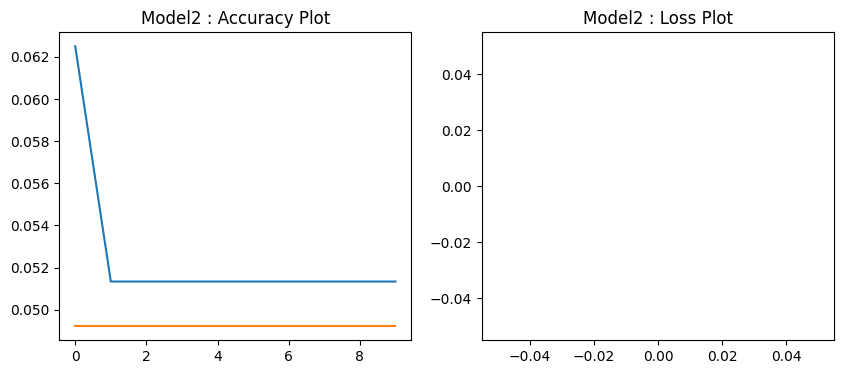

In [172]:
## plotting the graphs
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('Model2 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('Model2 : Loss Plot')
plt.show()

##### Model 2 Observations

#### Model 3 

    adding the scaling layer

In [174]:
### Your code goes here
model3 = Sequential()
# rescaling the model to get values in 0-1 range
model3.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

# 1st Conv2D with 16
model3.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
#                         input_shape=(180, 180, 3)
                        )
          )

model3.add(layers.MaxPooling2D(pool_size=(2, 2),
                            strides=None,
                            padding='same',)
          )
# 2nd Conv2D with 32
model3.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3)
                        )
          )

model3.add(layers.MaxPooling2D(pool_size=(2, 2),
                            strides=None,
                            padding='same',)
          )

model3.add(layers.Flatten())

model3.add(layers.Dense(128, activation='relu'))

model3.add(layers.Dense(len(class_names), activation='softmax'))

model3.summary() 


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 44, 44, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 123904)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      15,859,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,880,393 (60.58 MB)

 Trainable params: 15,880,393 (60.58 MB)

 Non-trainable params: 0 (0.00 B)

In [175]:

### Todo, choose an appropirate optimiser and loss function
model3.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model3_history = model3.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds, verbose=1)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 512ms/step - accuracy: 0.2038 - loss: 2.0905 - val_accuracy: 0.1924 - val_loss: 2.0197
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 462ms/step - accuracy: 0.2431 - loss: 1.9688 - val_accuracy: 0.2483 - val_loss: 2.0012
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 450ms/step - accuracy: 0.2811 - loss: 1.9814 - val_accuracy: 0.2058 - val_loss: 2.0238
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 450ms/step - accuracy: 0.2790 - loss: 1.9544 - val_accuracy: 0.3579 - val_loss: 1.8755
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 453ms/step - accuracy: 0.2833 - loss: 1.9555 - val_accuracy: 0.3266 - val_loss: 1.8931
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 449ms/step - accuracy: 0.2958 - loss: 1.8999 - val_accuracy: 0.3445 - val_loss: 1.9093
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 448ms/step - accuracy: 0.3193 - loss: 1.8661 - val_accuracy: 0.3714 - val_loss: 1.7783
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 456ms/step - accuracy: 0.3600 - loss: 1.8108 - val_accu

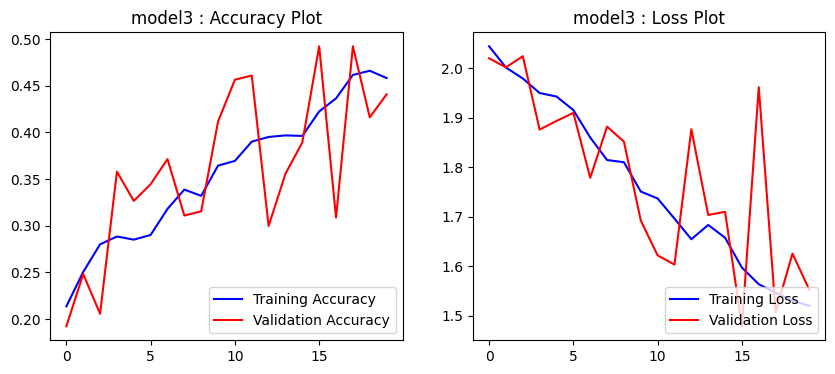

In [178]:

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model3_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(model3_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('model3 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model3_history.history['loss'], 'b', label='Training Loss')
plt.plot(model3_history.history['val_loss'], 'r', label='Validation Loss')
plt.title('model3 : Loss Plot')
plt.legend(loc='lower right')
plt.show()



##### Model 3 Observations

    1. Model accuracy has increased from earlier models but its still less than 50% for both training and Validation data.
    2. Loss on Training data has gradually decreased but validation shows spikes in it.
    3. Mode has not learnt correctly and may need more complex structure.
    4. As the curves are not smooth we can add the drop out layers in next models.


#### Model 4

    1. Doubled neurons in the conv2d layers 
    2. Added 1 more Conv2d and max pooling layer 
    3. Doubled Dense layer neurons to 256

In [179]:
### Your code goes here
model4 = Sequential()
# rescaling the model to get values in 0-1 range
model3.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

# 1st Conv2D with 32
model4.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3)
                        )
          )

model4.add(layers.MaxPooling2D(pool_size=(2, 2),
                            strides=None,
                            padding='same',)
          )
# 2nd Conv2D with 64
model4.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3)
                        )
          )

model4.add(layers.MaxPooling2D(pool_size=(2, 2),
                            strides=None,
                            padding='same',)
          )

# 3rd Conv2D with 128
model4.add(layers.Conv2D(128, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3)
                        )
          )

model4.add(layers.MaxPooling2D(pool_size=(2, 2),
                            strides=None,
                            padding='same',)
          )

model4.add(layers.Flatten())

model4.add(layers.Dense(256, activation='relu'))

model4.add(layers.Dense(len(class_names), activation='softmax'))

model4.summary() 


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 44, 44, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 42, 42, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 56448)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │      14,450,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,546,505 (55.49 MB)

 Trainable params: 14,546,505 (55.49 MB)

 Non-trainable params: 0 (0.00 B)

In [180]:

### Todo, choose an appropirate optimiser and loss function
model4.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model4_history = model4.fit(train_ds, batch_size=32, epochs=10, validation_data=val_ds, verbose=1)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 568ms/step - accuracy: 0.0973 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 550ms/step - accuracy: 0.0517 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 550ms/step - accuracy: 0.0519 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 569ms/step - accuracy: 0.0526 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 554ms/step - accuracy: 0.0459 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 552ms/step - accuracy: 0.0500 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 552ms/step - accuracy: 0.0528 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 563ms/step - accuracy: 0.0579 - loss: nan - val_accuracy: 0.0492 - val_loss: nan
Epoch 9/10
56/56

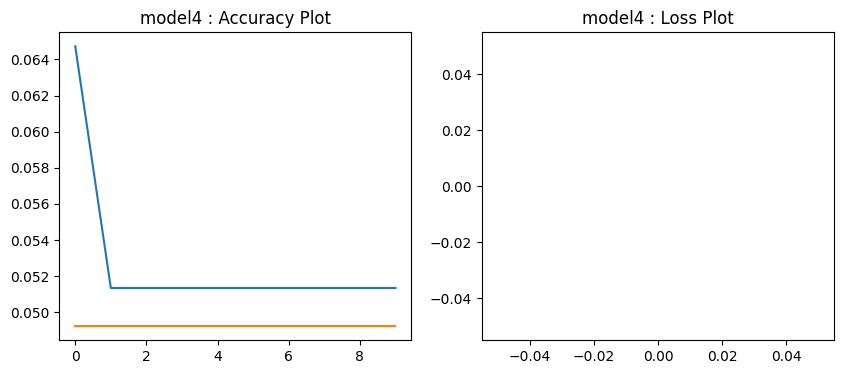

In [181]:

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model4_history.history['accuracy'])
plt.plot(model4_history.history['val_accuracy'])
plt.title('model4 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model4_history.history['loss'])
plt.plot(model4_history.history['val_loss'])
plt.title('model4 : Loss Plot')
plt.show()



##### Mode 4 Observations

    1. Not even a model

#### Model 5 
    1. only 2 conv2d layers but with high no of neurons
    2. Dense layer 256 neurons
    3. Default paras for pooling layers

In [182]:
### Your code goes here
model5 = Sequential()

# rescaling the model to get values in 0-1 range
model5.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

# 1st Conv2D with 64
model5.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model5.add(layers.MaxPooling2D() )

# 2nd Conv2D with 128
model5.add(layers.Conv2D(128, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model5.add(layers.MaxPooling2D() )

model5.add(layers.Flatten())

model5.add(layers.Dense(256, activation='relu'))

model5.add(layers.Dense(len(class_names), activation='softmax'))

model5.summary() 


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 259200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │      66,355,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [183]:

### Todo, choose an appropirate optimiser and loss function
model5.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model5_history = model5.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds, verbose=1)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.1879 - loss: 2.0574 - val_accuracy: 0.1969 - val_loss: 2.0291
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.2598 - loss: 2.0185 - val_accuracy: 0.2304 - val_loss: 1.9926
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.2489 - loss: 2.0098 - val_accuracy: 0.2617 - val_loss: 1.9507
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.2759 - loss: 1.9458 - val_accuracy: 0.2931 - val_loss: 1.8975
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.2961 - loss: 1.9181 - val_accuracy: 0.3378 - val_loss: 1.8403
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.3112 - loss: 1.8668 - val_accuracy: 0.4049 - val_loss: 1.7738
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.3407 - loss: 1.7950 - val_accuracy: 0.2774 - val_loss: 1.8506
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.3471 - loss: 1.7739 - val_accuracy: 0.2953 - va

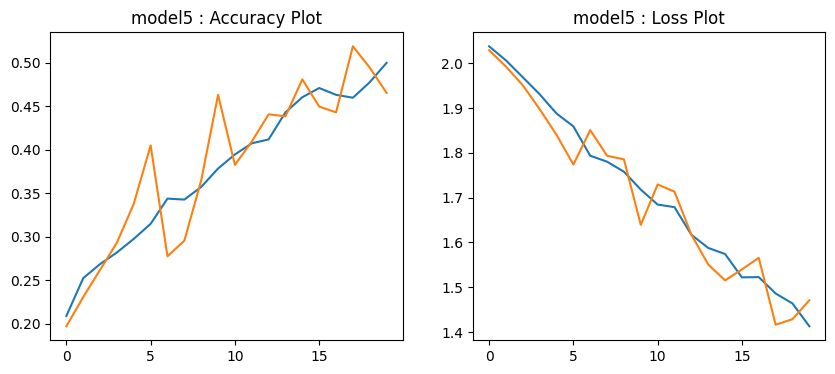

In [184]:

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model5_history.history['accuracy'])
plt.plot(model5_history.history['val_accuracy'])
plt.title('model5 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model5_history.history['loss'])
plt.plot(model5_history.history['val_loss'])
plt.title('model5 : Loss Plot')
plt.show()



##### Model 5 Observations

    1. Accuracy does not go beyond 50% for both training and validation data. 
    2. Loss is minimised

#### Model 6
    1. 2 conv2d layers 64 and 128
    2. 2 drop out layers
    3. dense layer of 256

In [185]:
### Your code goes here
model6 = Sequential()

# rescaling the model to get values in 0-1 range
model6.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

# 1st Conv2D with 64
model6.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model6.add(layers.MaxPooling2D() )
# 1st drop out layer
model6.add(layers.Dropout(0.2))
# 2nd Conv2D with 128
model6.add(layers.Conv2D(128, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model6.add(layers.MaxPooling2D() )
# 2nd drop out layer
model6.add(layers.Dropout(0.2))

model6.add(layers.Flatten())

model6.add(layers.Dense(256, activation='relu'))

model6.add(layers.Dense(len(class_names), activation='softmax'))

model6.summary() 


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 259200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │      66,355,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [186]:


### Todo, choose an appropirate optimiser and loss function
model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model6_history = model6.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds, verbose=1)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.1662 - loss: 9.1457 - val_accuracy: 0.2304 - val_loss: 2.0969
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.2399 - loss: 2.0073 - val_accuracy: 0.3333 - val_loss: 1.9488
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.3126 - loss: 1.8905 - val_accuracy: 0.3244 - val_loss: 1.8656
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4678 - loss: 1.5692 - val_accuracy: 0.3870 - val_loss: 1.8734
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4748 - loss: 1.4851 - val_accuracy: 0.4407 - val_loss: 1.5539
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5125 - loss: 1.3961 - val_accuracy: 0.4631 - val_loss: 1.5370
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5410 - loss: 1.3118 - val_accuracy: 0.4228 - val_loss: 1.6525
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5781 - loss: 1.1587 - val_accuracy: 0.4564 - v

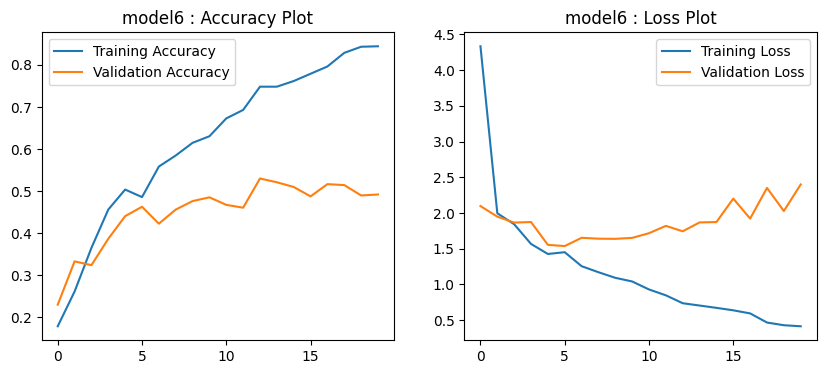

In [194]:


plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model6_history.history['accuracy'], label='Training Accuracy')
plt.plot(model6_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model6 : Accuracy Plot')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(model6_history.history['loss'], label='Training Loss')
plt.plot(model6_history.history['val_loss'], label='Validation Loss')
plt.title('model6 : Loss Plot')
plt.legend(loc='upper right')
plt.show()



##### Model 6 Observations

    => accuracy: 0.8616 - loss: 0.3769 - val_accuracy: 0.4922 - val_loss: 2.3994
    
    1. Training Accuracy is 86% and validation accuracy is only 50%. That mean model has learn the Traning Data very well but is not general enough for validation data. This mean we have Overfitting.
    2. Loss for training data has decreased gradually But the validation loss is incrasing. 
    3. For a good model, there should be minimum difference in Traning and Validation accuracy and should linearly increase to reach a platue.

#### Finalize the model
Choose an appropirate optimiser and loss function for model training 

#### Rerunning the selected models as computer got restarted

In [32]:
### Your code goes here
model6 = Sequential()

# rescaling the model to get values in 0-1 range
model6.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

# 1st Conv2D with 64
model6.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model6.add(layers.MaxPooling2D() )
# 1st drop out layer
model6.add(layers.Dropout(0.2))
# 2nd Conv2D with 128
model6.add(layers.Conv2D(128, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model6.add(layers.MaxPooling2D() )
# 2nd drop out layer
model6.add(layers.Dropout(0.5))

model6.add(layers.Flatten())

model6.add(layers.Dense(256, activation='relu'))

model6.add(layers.Dense(len(class_names), activation='softmax'))

model6.summary() 


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 259200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      66,355,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:


### Todo, choose an appropirate optimiser and loss function
model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model6_history = model6.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds, verbose=1)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.1607 - loss: 8.3513 - val_accuracy: 0.2908 - val_loss: 1.9595
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.2850 - loss: 1.9020 - val_accuracy: 0.3960 - val_loss: 1.6998
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.3955 - loss: 1.7019 - val_accuracy: 0.4720 - val_loss: 1.6088
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4533 - loss: 1.5359 - val_accuracy: 0.4519 - val_loss: 1.6867
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.4901 - loss: 1.4885 - val_accuracy: 0.5145 - val_loss: 1.4719
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5765 - loss: 1.2496 - val_accuracy: 0.4765 - val_loss: 1.5088
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5747 - loss: 1.2052 - val_accuracy: 0.5078 - val_loss: 1.4416
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6099 - loss: 1.1361 - val_accuracy: 0.5302 - v

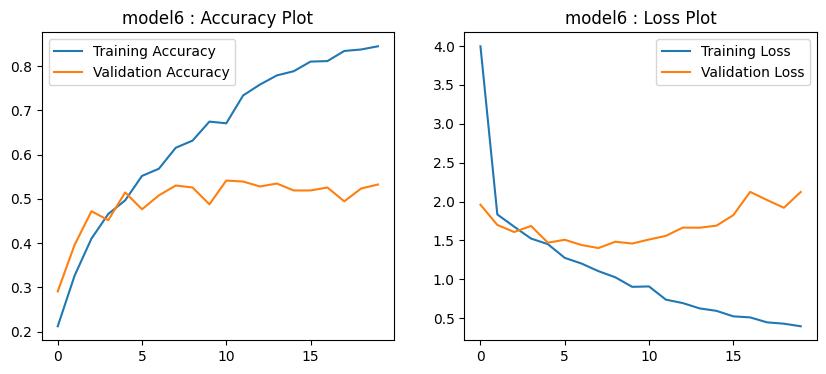

In [35]:


plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model6_history.history['accuracy'], label='Training Accuracy')
plt.plot(model6_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model6 : Accuracy Plot')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(model6_history.history['loss'], label='Training Loss')
plt.plot(model6_history.history['val_loss'], label='Validation Loss')
plt.title('model6 : Loss Plot')
plt.legend(loc='upper right')
plt.show()



#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Model Layers and paras

    1. Conv2d layer of 64 with kerner size 3
    2. Max pooling layer with (2,2)
    3. Dropout layer with 0.2
    4. Conv2d layer of 128 with kerner size 3
    5. Max pooling layer with (2,2)
    6. Dropout layer with 0.2
    7. Flatten Layer
    8. Dense layer of 256
    9. Adam optimizer with sparse_categorical_crossentropy
    10. No Normalization

Observations

    1. Traning accuracy and validation accuracy increase gradually.
    2. Validation accuracy is stalled at 50% whereas training accuracy is increasing. 
    3. Model migged up the training data and is poorly performing on validation data
    4. Loss also shows the same thing. Validation loss is mode than training data.

##### Model Architecture

        1. Conv2d layer of 32 with kerner size 3
        
2. Max pooling layer with (2,2)        
3. Dropout layer with 0.        2
4. Conv2d layer of 64 with kerner size         3
5. Max pooling layer with (2        ,2)
6. Dropout layer with         0.2
7. Conv2d layer of 128 with kerner s        ize 3
8. Max pooling layer with         (2,2)
9. Dropout layer w        ith 0.2
10. Flatt        en Layer
11. Dense lay        er of 128
12. Adam optimizer with sparse_categorical_crossentropy
ossentropy


In [41]:
epochs=20
model_1 = Sequential()
model_1.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3), offset=0.0))
# 1st Conv2D with 32
model_1.add(layers.Conv2D(32, kernel_size=(3,3), activation = 'relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)) )
model_1.add(layers.Dropout(0.2))
# 2nd Conv2D with 64
model_1.add(layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)) )
model_1.add(layers.Dropout(0.2))
# 2nd Conv2D with 128
model_1.add(layers.Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)) )
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu') )
model_1.add(layers.Dropout(0.25))
model_1.add(layers.Dense(len(class_names), activation='softmax'))
model_1.summary() 

### Todo, choose an appropirate optimiser and loss function
model_1.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", restore_best_weights=True, verbose=1)
model_history_1 = model_1.fit(train_ds, batch_size=32, epochs=epochs, validation_data=val_ds, callbacks = [earlystop], verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 734ms/step - accuracy: 0.1677 - loss: 3.4001 - val_accuracy: 0.1924 - val_loss: 2.0602
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 686ms/step - accuracy: 0.1876 - loss: 2.0459 - val_accuracy: 0.2058 - val_loss: 2.0717
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 744ms/step - accuracy: 0.2152 - loss: 2.0232 - val_accuracy: 0.2058 - val_loss: 2.0646
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 646ms/step - accuracy: 0.2076 - loss: 2.0448 - val_accuracy: 0.2036 - val_loss: 2.0349
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 601ms/step - accuracy: 0.2629 - loss: 1.9897 - val_accuracy: 0.3333 - val_loss: 1.8409
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 644ms/step - accuracy: 0.3678 - loss: 1.7271 - val_accuracy: 0.4497 - val_loss: 1.6744
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 645ms/step - accuracy: 0.4223 - loss: 1.5944 - val_accuracy: 0.4430 - val_loss: 1.6862
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 634ms/step - accuracy: 0.4546 - loss: 1.4936 - val_accu

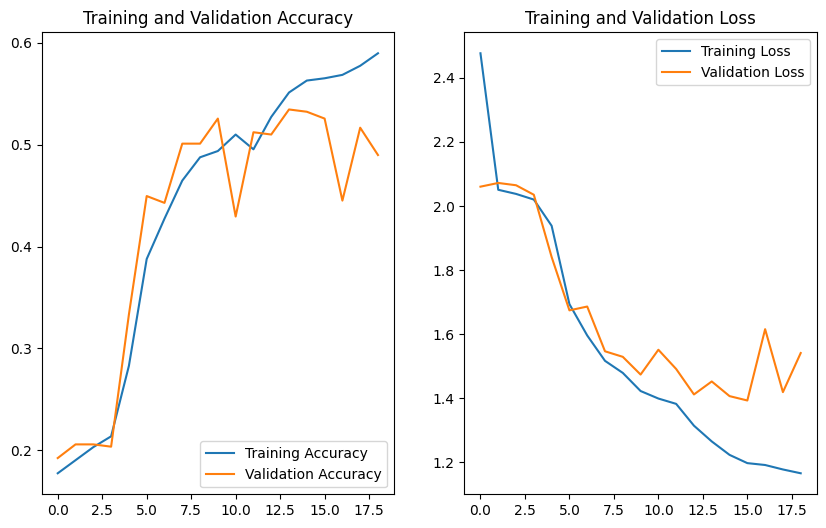

In [44]:
acc = model_history_1.history['accuracy']
val_acc = model_history_1.history['val_accuracy']
loss = model_history_1.history['loss']
val_loss = model_history_1.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model 1 Observations

    **Restoring model weights from the end of the best epoch: 14.**
    **accuracy: 0.5205 - loss: 1.3318 - val_accuracy: 0.5101 - val_loss: 1.4121**
    1. Model was trained for 19 epoch before early stopping was triggered. 
    2. Training and Validation accuracy increased gradually till 8 epochs but final accuracy was less than 60%.
    3. Model is overfitting as we see final Training Accuracy is higher than Validation Accuracy.
    4. Training Loss is also less than Validation loss which shows model is not able to predict well on validation data.

#### Overcoming Overfitting 

    Since we have Overfitting scenario we need to check if the data we have is balanced or not  

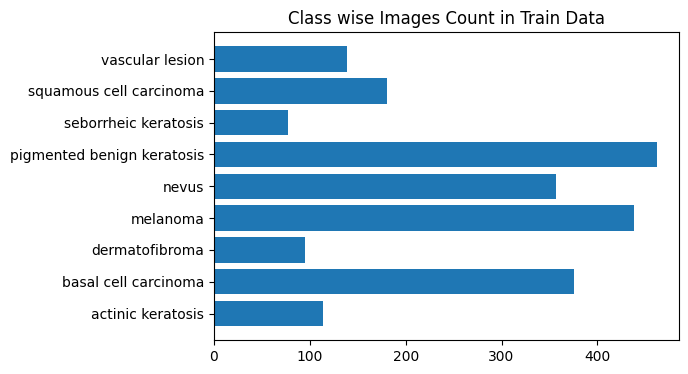

In [203]:
#Since we have Overfitting scenario we need to check if the data we have is balanced or not
plt.figure(figsize=(6,4))
plt.barh('class_names', 'train_image_count', data=df_images_count)
plt.title('Class wise Images Count in Train Data')
plt.show()

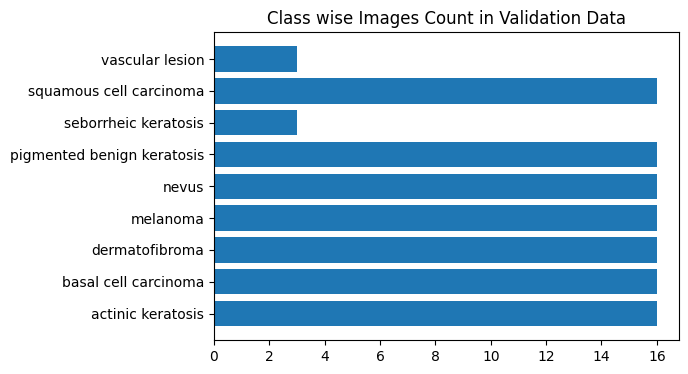

In [204]:
#Since we have Overfitting scenario we need to check if the data we have is balanced or not
plt.figure(figsize=(6,4))
plt.barh('class_names', 'test_image_count', data=df_images_count)
plt.title('Class wise Images Count in Validation Data')
plt.show()

As seen above, our data is highly imbalanced
Imbalaced data is major reason for Overfitting of the Model.

Overfitting can be reduced by 

    1. Adding the drop out layer (already added)
    2. Normalization
    3. Data Augumentation (lets try)

### Augumentation

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

In [46]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image1 = img_to_array(image)  # Convert image to a numpy array
image1 = np.expand_dims(image1, axis=0) 

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

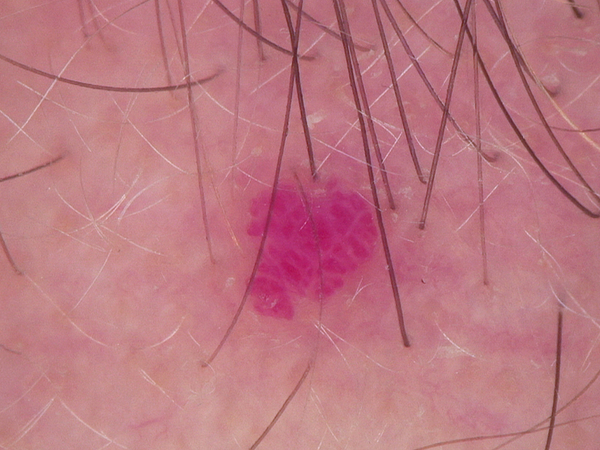

In [49]:
## we already have an image from previous loop. So lets use the same for augumentation
image

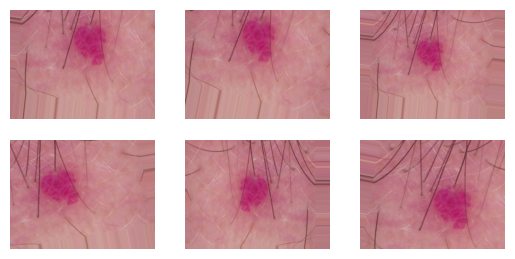

In [50]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
datagen1 = ImageDataGenerator(
    rotation_range=30,        # Random rotation by 30 degrees
    width_shift_range=0.2,    # Random horizontal shift
    height_shift_range=0.2,   # Random vertical shift
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
)
i = 0
for batch in datagen1.flow(image1, batch_size=1):
    i+=1
    if i > 6:
        break
    ax = plt.subplot(3, 3, i)
    plt.imshow(batch[0].astype("uint8"))
    plt.axis("off")

##### Augumented images are simillar enough so that they are categorized in 1 class and are different enough for Model to learn new things.

In [54]:
# above was a general image generator. but we need to create a layer of augumented data so lets create the same.

augmentation_layer = keras.Sequential(
    [
        layers.RandomRotation(factor=[0,0.3], input_shape=(img_height, img_width, 3)),
        layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='nearest'),
        layers.RandomZoom(0.2),
        layers.RandomFlip(mode='horizontal')
    ]
)

In [55]:
augmentation_layer.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation_2 (RandomRotation)   │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation                   │ (None, 180, 180, 3)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 180, 180, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Todo:
### Create the model, compile and train the model


Following models are created using different paras of layres with augumented data layers.

#### Model 7

In [239]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

model7 = Sequential()

# rescaling the model to get values in 0-1 range
model7.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

model7.add(augmentation_layer)

# 1st Conv2D with 
model7.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model7.add(layers.MaxPooling2D() )

model7.add(layers.Dropout(0.2))

# 2nd Conv2D with 64
model7.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model7.add(layers.MaxPooling2D() )

model7.add(layers.Dropout(0.2))

model7.add(layers.Flatten())

model7.add(layers.Dense(128, activation='relu'))

model7.add(layers.Dense(len(class_names), activation='softmax'))

model7.summary() 



C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │      16,588,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,609,481 (63.36 MB)

 Trainable params: 16,609,481 (63.36 MB)

 Non-trainable params: 0 (0.00 B)

In [240]:

### Todo, choose an appropirate optimiser and loss function
model7.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model7_history = model7.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds, verbose=1)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 711ms/step - accuracy: 0.2051 - loss: 2.0821 - val_accuracy: 0.1924 - val_loss: 2.0493
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 701ms/step - accuracy: 0.2294 - loss: 2.0195 - val_accuracy: 0.2685 - val_loss: 2.0643
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 605ms/step - accuracy: 0.2329 - loss: 2.0122 - val_accuracy: 0.1946 - val_loss: 2.0090
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 604ms/step - accuracy: 0.2329 - loss: 1.9898 - val_accuracy: 0.2371 - val_loss: 2.0717
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 610ms/step - accuracy: 0.3004 - loss: 1.9463 - val_accuracy: 0.2908 - val_loss: 1.9770
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 605ms/step - accuracy: 0.2890 - loss: 1.9604 - val_accuracy: 0.2640 - val_loss: 1.9759
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 605ms/step - accuracy: 0.2745 - loss: 1.9152 - val_accuracy: 0.2170 - val_loss: 2.0224
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 602ms/step - accuracy: 0.2959 - loss: 1.8986 - val_accu

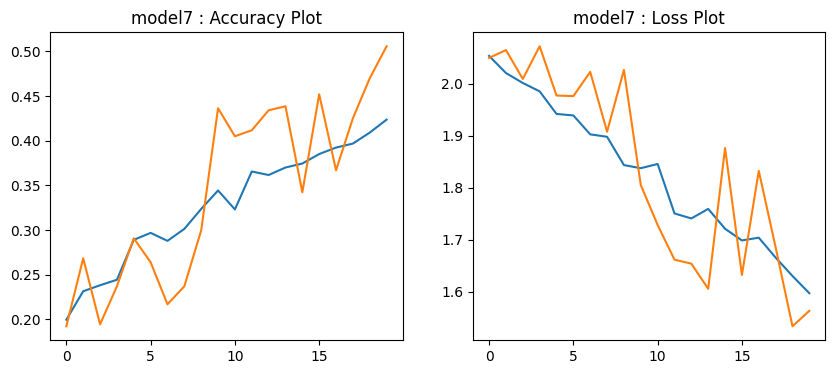

In [241]:


plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model7_history.history['accuracy'])
plt.plot(model7_history.history['val_accuracy'])
plt.title('model7 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model7_history.history['loss'])
plt.plot(model7_history.history['val_loss'])
plt.title('model7 : Loss Plot')
plt.show()



##### Model 7 Observations

#### Model 8

In [ ]:
3 conv2d layers, 2 drop outs

In [242]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

model8 = Sequential()

# rescaling the model to get values in 0-1 range
model8.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

model8.add(augmentation_layer)

# 1st Conv2D with 64
model8.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model8.add(layers.MaxPooling2D() )

model8.add(layers.Dropout(0.2))

# 2nd Conv2D with 128
model8.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model8.add(layers.MaxPooling2D() )

model8.add(layers.Dropout(0.2))

# 2nd Conv2D with 128
model8.add(layers.Conv2D(128, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model8.add(layers.MaxPooling2D() )

model8.add(layers.Dropout(0.5))

model8.add(layers.Flatten())

model8.add(layers.Dense(256, activation='relu'))

model8.add(layers.Dense(len(class_names), activation='softmax'))

model8.summary() 

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │      15,859,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,955,529 (60.87 MB)

 Trainable params: 15,955,529 (60.87 MB)

 Non-trainable params: 0 (0.00 B)

In [243]:

### Todo, choose an appropirate optimiser and loss function
model8.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model8_history = model8.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds, verbose=1)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 763ms/step - accuracy: 0.1801 - loss: 2.1029 - val_accuracy: 0.2058 - val_loss: 2.0744
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 753ms/step - accuracy: 0.2411 - loss: 2.0120 - val_accuracy: 0.2595 - val_loss: 2.0634
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 752ms/step - accuracy: 0.2392 - loss: 1.9820 - val_accuracy: 0.2998 - val_loss: 2.0540
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 752ms/step - accuracy: 0.2738 - loss: 1.9554 - val_accuracy: 0.2058 - val_loss: 2.1251
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 751ms/step - accuracy: 0.3012 - loss: 1.9725 - val_accuracy: 0.3490 - val_loss: 1.9045
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 749ms/step - accuracy: 0.2901 - loss: 1.9447 - val_accuracy: 0.3512 - val_loss: 1.8762
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 751ms/step - accuracy: 0.3280 - loss: 1.8578 - val_accuracy: 0.3400 - val_loss: 1.7979
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 748ms/step - accuracy: 0.3015 - loss: 1.9166 - val_accu

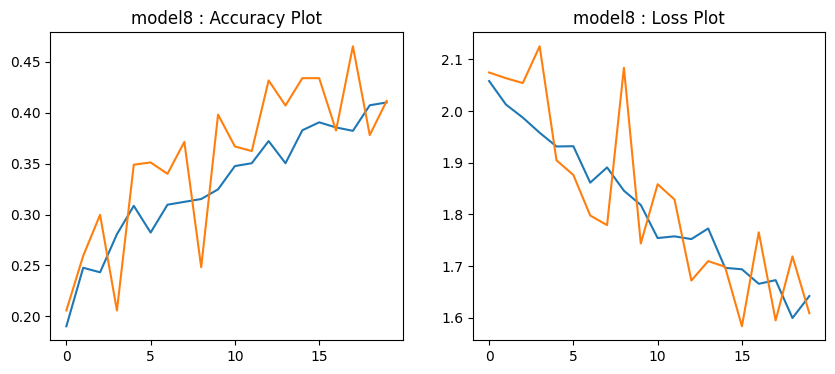

In [244]:


plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model8_history.history['accuracy'])
plt.plot(model8_history.history['val_accuracy'])
plt.title('model8 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model8_history.history['loss'])
plt.plot(model8_history.history['val_loss'])
plt.title('model8 : Loss Plot')
plt.show()



#### Model 9

    2 conv2d layers of 32 and 64
    2 drop out layers 2 of 0.2

In [245]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

model9 = Sequential()

# rescaling the model to get values in 0-1 range
model9.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

model9.add(augmentation_layer)

# 1st Conv2D with 32
model9.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model9.add(layers.MaxPooling2D() )

model9.add(layers.Dropout(0.2))

# 2nd Conv2D with 64
model9.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model9.add(layers.MaxPooling2D() )

model9.add(layers.Dropout(0.2))

model9.add(layers.Flatten())

model9.add(layers.Dense(128, activation='relu'))

model9.add(layers.Dense(len(class_names), activation='softmax'))

model9.summary() 

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │      16,588,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,609,481 (63.36 MB)

 Trainable params: 16,609,481 (63.36 MB)

 Non-trainable params: 0 (0.00 B)

In [246]:

### Todo, choose an appropirate optimiser and loss function
model9.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model9_history = model9.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds, verbose=1)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 737ms/step - accuracy: 0.1827 - loss: 5.3434 - val_accuracy: 0.3087 - val_loss: 2.0946
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 727ms/step - accuracy: 0.2653 - loss: 1.9424 - val_accuracy: 0.3915 - val_loss: 1.9208
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 728ms/step - accuracy: 0.3551 - loss: 1.7851 - val_accuracy: 0.4049 - val_loss: 1.8475
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 732ms/step - accuracy: 0.4192 - loss: 1.6103 - val_accuracy: 0.4139 - val_loss: 1.6937
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 791ms/step - accuracy: 0.4311 - loss: 1.5661 - val_accuracy: 0.4385 - val_loss: 1.6683
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 892ms/step - accuracy: 0.4490 - loss: 1.5465 - val_accuracy: 0.4832 - val_loss: 1.5601
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 878ms/step - accuracy: 0.4543 - loss: 1.5443 - val_accuracy: 0.4855 - val_loss: 1.5272
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 840ms/step - accuracy: 0.4661 - loss: 1.5324 - val_accu

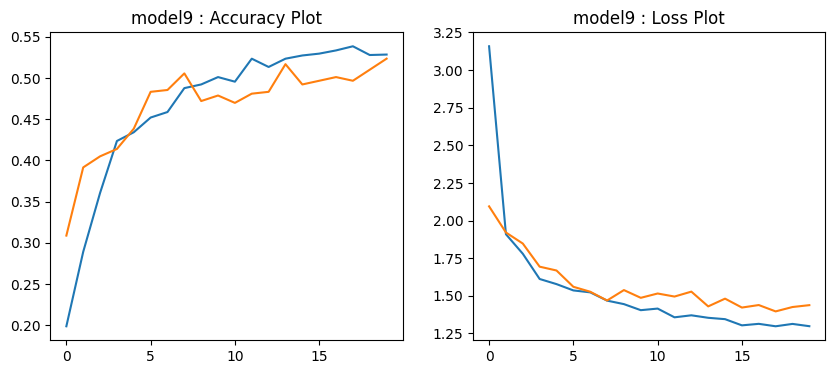

In [247]:

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model9_history.history['accuracy'])
plt.plot(model9_history.history['val_accuracy'])
plt.title('model9 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model9_history.history['loss'])
plt.plot(model9_history.history['val_loss'])
plt.title('model9 : Loss Plot')
plt.show()



##### Model 9 Summary

Config

    2 conv2d layers of 32 and 64
    2 drop out layers 2 of 0.2

Observations

    0.5315 - loss: 1.3086 - val_accuracy: 0.5235 - val_loss: 1.4380
    Accuraccy less than 55%. Validation accuracy incraeses linearly along Training data.
    Losses decrease simultaniously.  slight overfitting.

#### Model 10 

    3 conv2d layers of 32, 64, 128
    3 drop out layers 0.2, 0.2, 0.5

In [248]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

model10 = Sequential()

# rescaling the model to get values in 0-1 range
model10.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

model10.add(augmentation_layer)

# 1st Conv2D with 64
model10.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model10.add(layers.MaxPooling2D() )

model10.add(layers.Dropout(0.2))

# 2nd Conv2D with 128
model10.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model10.add(layers.MaxPooling2D() )

model10.add(layers.Dropout(0.2))

# 2nd Conv2D with 128
model10.add(layers.Conv2D(128, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model10.add(layers.MaxPooling2D() )

model10.add(layers.Dropout(0.5))

model10.add(layers.Flatten())

model10.add(layers.Dense(256, activation='relu'))

model10.add(layers.Dense(len(class_names), activation='softmax'))

model10.summary() 

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │      15,859,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,955,529 (60.87 MB)

 Trainable params: 15,955,529 (60.87 MB)

 Non-trainable params: 0 (0.00 B)

In [249]:

### Todo, choose an appropirate optimiser and loss function
model10.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
			  
# View the summary of all layers
model10_history = model10.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds, verbose=1)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 57s 971ms/step - accuracy: 0.1692 - loss: 4.0978 - val_accuracy: 0.1790 - val_loss: 2.0996
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 966ms/step - accuracy: 0.1866 - loss: 2.0354 - val_accuracy: 0.2170 - val_loss: 2.0614
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.2150 - loss: 2.0286 - val_accuracy: 0.2662 - val_loss: 2.0025
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 871ms/step - accuracy: 0.2323 - loss: 2.0197 - val_accuracy: 0.2438 - val_loss: 2.0710
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 872ms/step - accuracy: 0.2258 - loss: 2.0131 - val_accuracy: 0.2819 - val_loss: 1.9552
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 870ms/step - accuracy: 0.2500 - loss: 1.9584 - val_accuracy: 0.3132 - val_loss: 1.8662
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 878ms/step - accuracy: 0.3132 - loss: 1.8859 - val_accuracy: 0.3400 - val_loss: 1.7659
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 875ms/step - accuracy: 0.4310 - loss: 1.6490 - val_accurac

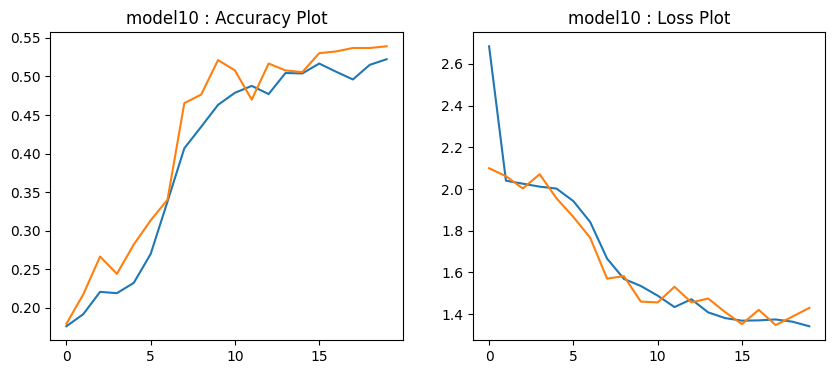

In [250]:


plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model10_history.history['accuracy'])
plt.plot(model10_history.history['val_accuracy'])
plt.title('model10 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model10_history.history['loss'])
plt.plot(model10_history.history['val_loss'])
plt.title('model10 : Loss Plot')
plt.show()



##### Model 10 Observations

Architecture

    3 conv2d layers of 32, 64, 128
    3 drop out layers 0.2, 0.2, 0.5

Observations

    Accuracy again less than 55%. Validation accuracy is better than training accuracy. 
    Losses are similar for both training and validation. Model is trained well.

#### Model 11

    3 conv2d layers of 32, 64, 128
    4 drop out layers 0.2, 0.2, 0.5, 0.25

In [255]:
## Your code goes here

model11 = Sequential()

# rescaling the model to get values in 0-1 range
model11.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

model11.add(augmentation_layer)

# 1st Conv2D with 32
model11.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model11.add(layers.MaxPooling2D() )

model11.add(layers.Dropout(0.2))

# 2nd Conv2D with 64
model11.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model11.add(layers.MaxPooling2D() )

model11.add(layers.Dropout(0.2))

# 2nd Conv2D with 128
model11.add(layers.Conv2D(128, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model11.add(layers.MaxPooling2D() )

model11.add(layers.Dropout(0.5))

model11.add(layers.Flatten())

model11.add(layers.Dense(128, activation='relu'))

model11.add(layers.Dropout(0.25))

model11.add(layers.Dense(len(class_names), activation='softmax'))

model11.summary() 


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

In [257]:

### Todo, choose an appropirate optimiser and loss function
model11.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# ModelCheckpoint callback is used to save the model or weights at specific intervals
# It saves the best model based on the validation accuracy
# The saved model can be loaded later to continue training from the saved state
checkpoint = ModelCheckpoint("model11.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# EarlyStopping callback is used to stop training when a monitored metric stops improving
# It helps prevent overfitting by stopping training when validation accuracy plateaus
earlystop = EarlyStopping(monitor="val_accuracy", patience=3, mode="auto", verbose=1)

# View the summary of all layers
model11_history = model11.fit(train_ds, batch_size=32, epochs=50, validation_data=val_ds, verbose=1)


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 828ms/step - accuracy: 0.1897 - loss: 3.6200 - val_accuracy: 0.2595 - val_loss: 2.0780
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 798ms/step - accuracy: 0.2815 - loss: 1.9531 - val_accuracy: 0.3333 - val_loss: 1.7959
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 769ms/step - accuracy: 0.3179 - loss: 1.7851 - val_accuracy: 0.4049 - val_loss: 1.6895
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 798ms/step - accuracy: 0.3801 - loss: 1.6832 - val_accuracy: 0.4139 - val_loss: 1.6395
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 774ms/step - accuracy: 0.4030 - loss: 1.6178 - val_accuracy: 0.4452 - val_loss: 1.5692
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 771ms/step - accuracy: 0.4177 - loss: 1.5687 - val_accuracy: 0.4318 - val_loss: 1.5652
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 767ms/step - accuracy: 0.4514 - loss: 1.5502 - val_accuracy: 0.4765 - val_loss: 1.5138
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 807ms/step - accuracy: 0.4602 - loss: 1.4717 - val_accu

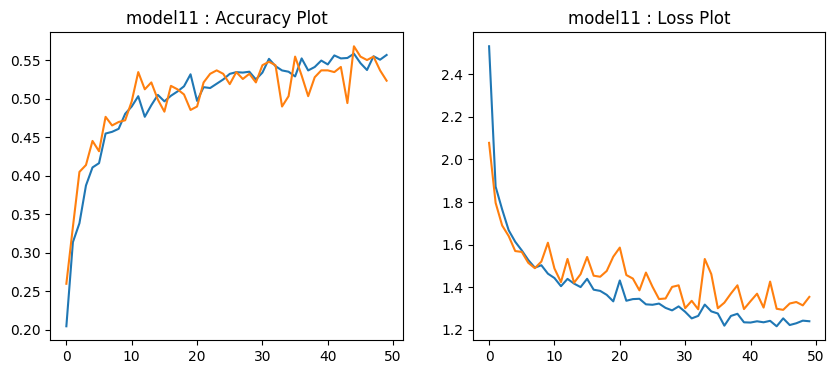

In [258]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(model11_history.history['accuracy'])
plt.plot(model11_history.history['val_accuracy'])
plt.title('model11 : Accuracy Plot')
plt.subplot(1,2,2)
plt.plot(model11_history.history['loss'])
plt.plot(model11_history.history['val_loss'])
plt.title('model11 : Loss Plot')
plt.show()

##### Model 11 Summary

Architecture

    3 conv2d layers of 32, 64, 128
    4 drop out layers 0.2, 0.2, 0.5, 0.25
    Last drop out layer is after flatten layer
Observations

    Even with 50 epochs, model did not stop. Accuracy is under 60% for both Training and validation datasets.
    Loss has been reduced. 
    Gradual increase in the accuracy and descent in the loss shows that model is trained good. 
    validation loss is little more than the traning loss so model is not performing well on validation.
    Model 11 is overfitting compared with model 10.

#### Model 12

    1. Conv2d layer of 64 with kerner size 3
    2. Max pooling layer with (2,2)
    3. Dropout layer with 0.2
    4. Conv2d layer of 128 with kerner size 3
    5. Max pooling layer with (2,2)
    6. Dropout layer with 0.2
    7. Flatten Layer
    8. Dense layer of 256
    9. Adam optimizer with sparse_categorical_crossentropy
    10. No Normalization

In [47]:
## Your code goes here

model12 = Sequential()

# rescaling the model to get values in 0-1 range
model12.add(layers.Rescaling(1./255, input_shape=(180, 180, 3), offset=0.0))

model12.add(augmentation_layer)

# 1st Conv2D with 32
model12.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model12.add(layers.MaxPooling2D() )

# 2nd Conv2D with 64
model12.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model12.add(layers.MaxPooling2D() )

# 2nd Conv2D with 128
model12.add(layers.Conv2D(128, 
                         kernel_size=(3,3), 
                         activation = 'relu', 
                         input_shape=(180, 180, 3),
                         padding='same'
                        )
          )

model12.add(layers.MaxPooling2D() )

model12.add(layers.Dropout(0.5))

model12.add(layers.Flatten())

model12.add(layers.Dense(128, activation='relu'))

model12.add(layers.Dropout(0.25))

model12.add(layers.Dense(len(class_names), activation='softmax'))

model12.summary() 


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [48]:
## Your code goes here

model12.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Training the model

In [49]:
## Your code goes here, note: train your model for 20 epochs
model12_history = model12.fit(train_ds, batch_size=32, epochs=20, validation_data=val_ds, verbose=1)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 769ms/step - accuracy: 0.1620 - loss: 2.4272 - val_accuracy: 0.3221 - val_loss: 1.9132
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 792ms/step - accuracy: 0.2796 - loss: 1.9483 - val_accuracy: 0.3154 - val_loss: 1.8528
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 746ms/step - accuracy: 0.3400 - loss: 1.8180 - val_accuracy: 0.3848 - val_loss: 1.6993
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 776ms/step - accuracy: 0.3460 - loss: 1.7644 - val_accuracy: 0.4564 - val_loss: 1.5675
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 832ms/step - accuracy: 0.4158 - loss: 1.6328 - val_accuracy: 0.5056 - val_loss: 1.4999
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 921ms/step - accuracy: 0.4331 - loss: 1.5731 - val_accuracy: 0.4944 - val_loss: 1.5348
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 760ms/step - accuracy: 0.4757 - loss: 1.4803 - val_accuracy: 0.5190 - val_loss: 1.4337
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 761ms/step - accuracy: 0.4853 - loss: 1.4988 - val_accu

### Visualizing the results

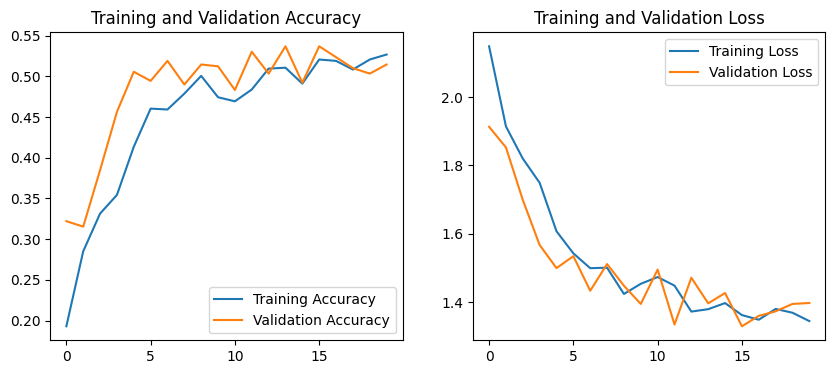

In [51]:
acc = model12_history.history['accuracy']
val_acc = model12_history.history['val_accuracy']

loss = model12_history.history['loss']
val_loss = model12_history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.axis('on')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

##### Model 10 Observations

Architecture

    1. Conv2d layer of 64 with kerner size 3
    2. Max pooling layer with (2,2)
    3. Dropout layer with 0.2
    4. Conv2d layer of 128 with kerner size 3
    5. Max pooling layer with (2,2)
    6. Dropout layer with 0.2
    7. Flatten Layer
    8. Dense layer of 256
    9. Adam optimizer with sparse_categorical_crossentropy
    10. No Normalization

Observations

    Accuracy again less than 55%. Validation accuracy is better than training accuracy. 
    Losses are similar for both training and validation. 


    Next model is with given data and augumented data combined.

In [58]:
del model_2

In [59]:
model_2 = Sequential()
model_2.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3), offset=0.0))
model_2.add(augmentation_layer)
# 1st Conv2D with 32
model_2.add(layers.Conv2D(32, kernel_size=(3,3), activation = 'relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)) )
model_2.add(layers.Dropout(0.2))
# 2nd Conv2D with 64
model_2.add(layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)) )
model_2.add(layers.Dropout(0.2))
# 2nd Conv2D with 128
model_2.add(layers.Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)) )
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu') )
model_2.add(layers.Dropout(0.25))
model_2.add(layers.Dense(len(class_names), activation='softmax'))
model_2.summary() 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
epochs=30
### Todo, choose an appropirate optimiser and loss function
model_2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", restore_best_weights=True, verbose=1)
model_history_2 = model_2.fit(train_ds, batch_size=32, epochs=epochs, validation_data=val_ds, callbacks = [earlystop], verbose=1)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 757ms/step - accuracy: 0.1790 - loss: 3.1033 - val_accuracy: 0.2617 - val_loss: 2.0336
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 708ms/step - accuracy: 0.2611 - loss: 2.0258 - val_accuracy: 0.1924 - val_loss: 1.9961
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 728ms/step - accuracy: 0.2919 - loss: 1.9378 - val_accuracy: 0.3602 - val_loss: 1.7681
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 680ms/step - accuracy: 0.3444 - loss: 1.7944 - val_accuracy: 0.4027 - val_loss: 1.6813
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 721ms/step - accuracy: 0.3824 - loss: 1.6873 - val_accuracy: 0.4027 - val_loss: 1.6553
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 777ms/step - accuracy: 0.3959 - loss: 1.6492 - val_accuracy: 0.4139 - val_loss: 1.6231
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 782ms/step - accuracy: 0.3897 - loss: 1.6665 - val_accuracy: 0.4228 - val_loss: 1.6339
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 748ms/step - accuracy: 0.4188 - loss: 1.5924 - val_accu

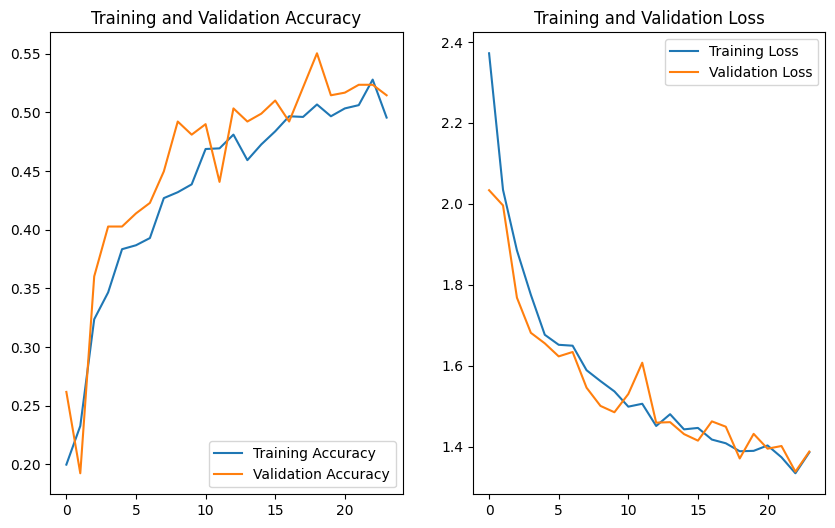

In [61]:
### Visualization
acc = model_history_2.history['accuracy']
val_acc = model_history_2.history['val_accuracy']
loss = model_history_2.history['loss']
val_loss = model_history_2.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Observations

    With augumented data, we see that the model is no longer overfitting. 
    Accuracy for both Training and Validation is less than 55% but the validation accuracy is better than training accuracy.

#### **Todo:** Find the distribution of classes in the training dataset.

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

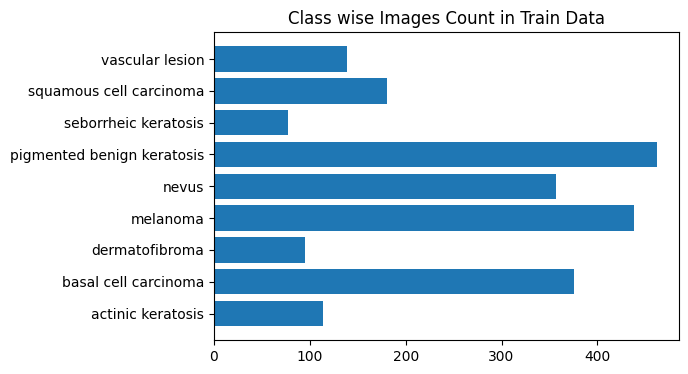

In [62]:
## Your code goes here.
plt.figure(figsize=(6,4))
plt.barh('class_names', 'train_image_count', data=df_images_count)
plt.title('Class wise Images Count in Train Data')
plt.show()

#### **Todo:** Write your findings here: 

    We see the class imbalance here. 2 classes have less than 100 samples. 4 classes have more than 350 samples.
##### Q Which class has the least number of samples?
    seborrheic keratosis = 77
    
##### Q Which classes dominate the data in terms proportionate number of samples?
    pigmented benign kerato - 20.6% - 462 image samples12

In [63]:
round(df_images_count['train_image_count']*100/df_images_count['train_image_count'].sum(), 2)

0     5.09
1    16.79
2     4.24
3    19.56
4    15.94
5    20.63
6     3.44
7     8.08
8     6.21
Name: train_image_count, dtype: float64

In [70]:
df1 = df_images_count.set_index('class_names')
df1

,train_image_count,test_image_count
class_names,,
actinic keratosis,114,16
basal cell carcinoma,376,16
dermatofibroma,95,16
melanoma,438,16
nevus,357,16
pigmented benign keratosis,462,16
seborrheic keratosis,77,3
squamous cell carcinoma,181,16
vascular lesion,139,3


#### **Todo:** Rectify the class imbalance: Create augumented data
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [279]:
!pip install Augmentor


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [68]:
data_dir_train

WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma Detection/Data/Train - Copy')

In [69]:
for i in class_names:
    print(str(data_dir_train) + '\\' + i)

C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\actinic keratosis
C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\basal cell carcinoma
C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\dermatofibroma
C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\melanoma
C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\nevus
C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\pigmented benign keratosis
C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\seborrheic keratosis
C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\squamous cell carcinoma
C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\vascular lesion


In [73]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + '\\' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    print('--'*60)

Initialised with 114 image(s) found.
Output directory set to C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F7C0813F50>: 100%|█| 500/500 [00:05<00:00, 93.30 Samples/


------------------------------------------------------------------------------------------------------------------------
Initialised with 376 image(s) found.
Output directory set to C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F7C4A26850>: 100%|█| 500/500 [00:04<00:00, 103.48 Samples


------------------------------------------------------------------------------------------------------------------------
Initialised with 95 image(s) found.
Output directory set to C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F7CA2BE690>: 100%|█| 500/500 [00:05<00:


------------------------------------------------------------------------------------------------------------------------
Initialised with 438 image(s) found.
Output directory set to C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F7CA21F6D0>: 100%|█| 500/500 [00:24<00:00, 20.38 Samples


------------------------------------------------------------------------------------------------------------------------
Initialised with 357 image(s) found.
Output directory set to C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x1F7C4DFC150>: 100%|█| 500/500 [00:19<00:00, 25.33 Samples/


------------------------------------------------------------------------------------------------------------------------
Initialised with 462 image(s) found.
Output directory set to C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F7C4E04590>: 100%|█| 500/500 [00:03<00:00, 125.93 Samples


------------------------------------------------------------------------------------------------------------------------
Initialised with 77 image(s) found.
Output directory set to C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1F7C4979190>: 100%|█| 500/500 [00:12<00


------------------------------------------------------------------------------------------------------------------------
Initialised with 181 image(s) found.
Output directory set to C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F7C49D82D0>: 100%|█| 500/500 [00:04<00:00, 111.06 Samples


------------------------------------------------------------------------------------------------------------------------
Initialised with 139 image(s) found.
Output directory set to C:\Machine Learning Drive\Case Study - CNN - Melanoma Detection\Data\Train - Copy\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F7C0758D50>: 100%|█| 500/500 [00:05<00:00, 93.81 Samples/

------------------------------------------------------------------------------------------------------------------------


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [74]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [64]:
import glob
import os

In [75]:
data_dir_train

WindowsPath('C:/Machine Learning Drive/Case Study - CNN - Melanoma Detection/Data/Train - Copy')

In [65]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[0]

'C:\\Machine Learning Drive\\Case Study - CNN - Melanoma Detection\\Data\\Train - Copy\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_21ca1268-0ef8-426d-a040-edea1d775326.jpg'

In [66]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0]

'actinic keratosis'

In [67]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [75]:
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

Total number of augmented images: 4500


In [79]:
os.path.join(data_dir_train, '*', '*.jpg')
len(list(data_dir_train.glob('*/output/*.jpg')))

4500

In [90]:
data_dir_train.glob('*/output/*.jpg') 

<generator object Path.glob at 0x000002CCA3303780>

#### Create combined Train data created using Augmentor and given data

In [80]:
batch_size = 32
img_height = 180
img_width = 180

##### **Todo:** Create a training dataset

In [81]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


##### **Todo:** Create a validation dataset

In [82]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [83]:
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Create your model (make sure to include normalization) (final 1)

Model Artchitecture

In previous model, we started with high nuerons (conv2d 64 and 128) but did not get good efficiency. so now we will add smaller laters and also use the drop out layers.

    1. Conv2d layer of 32 with kerner size 3
    2. Max pooling layer with (2,2)
    3. Conv2d layer of 64 with kerner size 3
    4. Max pooling layer with (2,2)
    5. Conv2d layer of 128 with kerner size 3
    6. Max pooling layer with (2,2)
    7. Dropout layer with 0.5
    7. Flatten Layer
    8. Dense layer of 128
    9. Adam optimizer with sparse_categorical_crossentropy
    10. No Normalization

In [118]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

model = Sequential()

# rescaling the model to get values in 0-1 range
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3), offset=0.0))

# 1st Conv2D with 32
model.add(layers.Conv2D(32, 
                         kernel_size=(3,3), 
                         activation = 'relu'
                        )
          )

model.add(layers.MaxPooling2D(pool_size=(2,2)) )

# 2nd Conv2D with 64
model.add(layers.Conv2D(64, 
                         kernel_size=(3,3), 
                         activation = 'relu'
                        )
          )

model.add(layers.MaxPooling2D(pool_size=(2,2)) )

# 2nd Conv2D with 128
model.add(layers.Conv2D(128, 
                         kernel_size=(3,3), 
                         activation = 'relu'
                        )
          )

model.add(layers.MaxPooling2D(pool_size=(2,2)) )

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.25))

model.add(layers.Dense(len(class_names), activation='softmax'))

model.summary() 


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

##### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [122]:

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=5, # number of epochs to wait for before stopping
                          mode="auto", # "auto"` mode, min or max, the direction is automatically.
                          restore_best_weights=True,
                          verbose=1)

##### **Todo:**  Train your model

In [123]:
epochs = 30

# View the summary of all layers
model_history = model.fit(train_ds, batch_size=32, epochs=epochs, validation_data=val_ds, 
                          callbacks = [earlystop], 
                          verbose=1)

## Your code goes here, use 50 epochs.

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 155s 893ms/step - accuracy: 0.2052 - loss: 2.1238 - val_accuracy: 0.4388 - val_loss: 1.4560
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.4230 - loss: 1.5164 - val_accuracy: 0.4729 - val_loss: 1.3798
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 109s 645ms/step - accuracy: 0.4635 - loss: 1.4067 - val_accuracy: 0.5174 - val_loss: 1.2752
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 108s 638ms/step - accuracy: 0.5403 - loss: 1.2193 - val_accuracy: 0.5538 - val_loss: 1.1780
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 105s 623ms/step - accuracy: 0.5653 - loss: 1.1465 - val_accuracy: 0.5917 - val_loss: 1.0822
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 100s 589ms/step - accuracy: 0.6285 - loss: 0.9969 - val_accuracy: 0.6229 - val_loss: 0.9876
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 98s 580ms/step - accuracy: 0.6748 - loss: 0.8852 - val_accuracy: 0.6719 - val_loss: 0.8947
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 98s 581ms/step - accuracy: 0.7059 - loss

##### **Todo:**  Visualize the model results

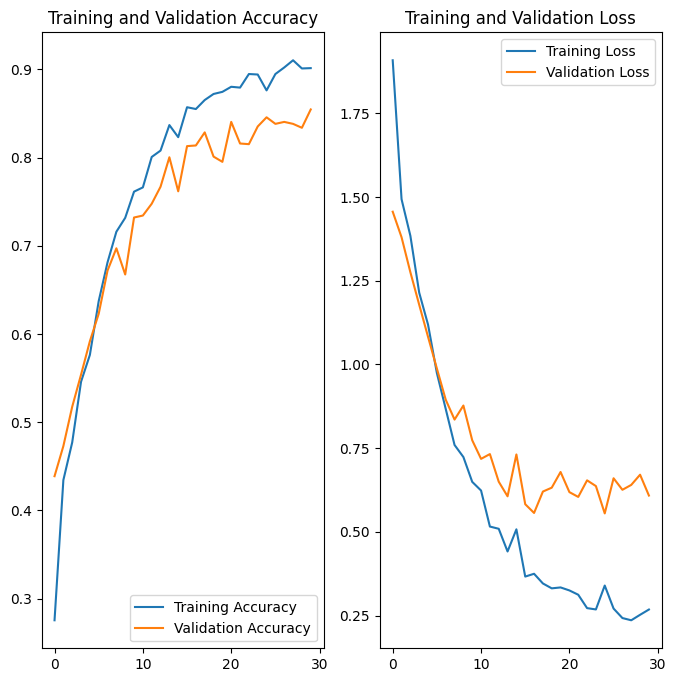

In [124]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [131]:
print('Training ACcuracy:', round(acc[-1]*100, 1), 'Validation Accuracy:', round(val_acc[-1]*100, 1))

Training ACcuracy: 90.1 Validation Accuracy: 85.4


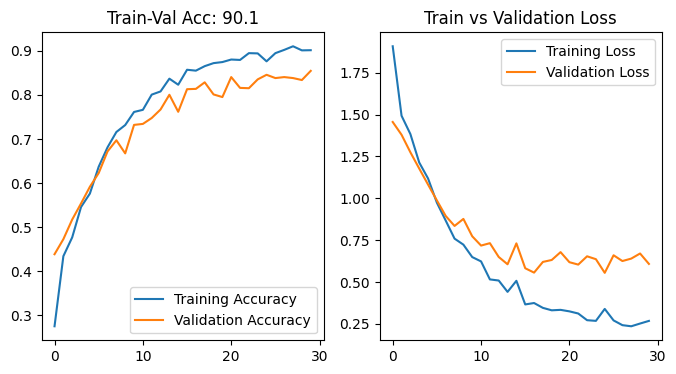

In [139]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train-Val Acc: ' + str(round(acc[-1]*100, 1)))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train vs Validation Loss')
plt.show()

##### Observations

**Training Accuracy: 90.1 Validation Accuracy: 85.4**

    1. Model reached efficiency beyond 80% which is very big jump over the earlier models. So Data Augumentation did help us improve model.
    2. Having said that, we still see the validation accuracy less. Loss also shows that model is overfitting and needs improvement. 

#### Final model v2 (Final 2)

##### Creating final model to improve accuracy by adding 2 more drop out layers after convolution layers. 

In [155]:
model_f1 = Sequential()
model_f1.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3), offset=0.0))
# 1st Conv2D with 32
model_f1.add(layers.Conv2D(32, kernel_size=(3,3), activation = 'relu'))
model_f1.add(layers.MaxPooling2D(pool_size=(2,2)) )
model_f1.add(layers.Dropout(0.2))
# 2nd Conv2D with 64
model_f1.add(layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model_f1.add(layers.MaxPooling2D(pool_size=(2,2)) )
model_f1.add(layers.Dropout(0.2))
# 2nd Conv2D with 128
model_f1.add(layers.Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model_f1.add(layers.MaxPooling2D(pool_size=(2,2)) )
model_f1.add(layers.Dropout(0.5))
model_f1.add(layers.Flatten())
model_f1.add(layers.Dense(128, activation='relu') )
model_f1.add(layers.Dropout(0.25))
model_f1.add(layers.Dense(len(class_names), activation='softmax'))
model_f1.summary() 

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [158]:

### Todo, choose an appropirate optimiser and loss function
model_f1.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=5, # number of epochs to wait for before stopping
                          mode="auto", # "auto"` mode, min or max, the direction is automatically.
                          restore_best_weights=True,
                          verbose=1)

In [159]:
epochs = 30

# View the summary of all layers
model_history = model_f1.fit(train_ds, batch_size=32, epochs=epochs, validation_data=val_ds, 
                          callbacks = [earlystop], 
                          verbose=1)

## Your code goes here, use 50 epochs.

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.1369 - loss: 2.2456 - val_accuracy: 0.2532 - val_loss: 1.9383
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 121s 718ms/step - accuracy: 0.2794 - loss: 1.8385 - val_accuracy: 0.4091 - val_loss: 1.6630
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 147s 869ms/step - accuracy: 0.3896 - loss: 1.5558 - val_accuracy: 0.4425 - val_loss: 1.4735
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 152s 900ms/step - accuracy: 0.4383 - loss: 1.4539 - val_accuracy: 0.4402 - val_loss: 1.4018
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.4781 - loss: 1.3515 - val_accuracy: 0.5011 - val_loss: 1.2782
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.5177 - loss: 1.2579 - val_accuracy: 0.5419 - val_loss: 1.2158
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 162s 961ms/step - accuracy: 0.5431 - loss: 1.2058 - val_accuracy: 0.5471 - val_loss: 1.1743
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 168s 989ms/step - accuracy: 0.5671 - loss: 1.

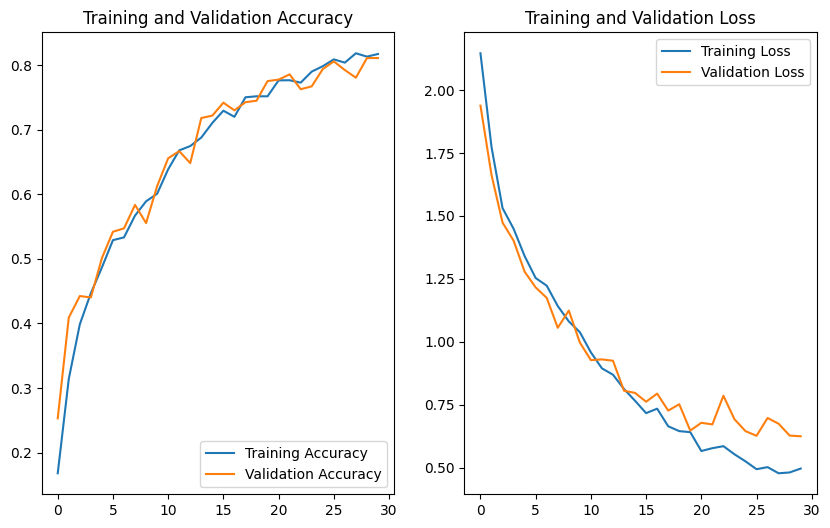

Train :Accuracy: 0.8300 - loss: 0.4472
Validation Accuracy: 0.8107 - val_loss: 0.6243


In [169]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print('Train :Accuracy: 0.8300 - loss: 0.4472')
print('Validation Accuracy: 0.8107 - val_loss: 0.6243')

##### Observations

This time we have added 2 drop out layers to smoothen the curve of the accuracy. 

**accuracy: 0.8300 - loss: 0.4472 - val_accuracy: 0.8107 - val_loss: 0.6243**

    1. Both training and validation accuracy has decreased as compared to earlier model but model is not overfitting.
    2. Validation Loss is higher than training loss. 